In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df=pd.read_table('/content/drive/MyDrive/smsspamcollection.tsv')

In [5]:
df.sample(30)

,label,message,length,punct
4263,ham,You'll never believe this but i have actually ...,69,2
34,spam,Thanks for your subscription to Ringtone UK yo...,158,2
4431,ham,Yar lor... How u noe? U used dat route too?,43,5
1537,ham,How's it feel? Mr. Your not my real Valentine ...,91,5
2619,ham,Hey pple...$700 or $900 for 5 nights...Excelle...,81,11
78,ham,Does not operate after &lt;#&gt; or what,42,5
3309,ham,But i'm surprised she still can guess right lo...,50,4
4581,ham,Hi ....My engagement has been fixd on &lt;#&g...,142,22
339,ham,"Sorry, I'll call later",22,2
756,ham,So why didnt you holla?,23,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

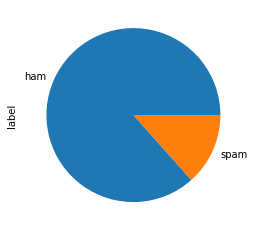

In [8]:
df['label'].value_counts().plot.pie()

In [9]:
str_null=[]
for indx,lbl,msg,lg,pt in df.itertuples():
  if type(msg)==str:
    if msg.isspace():
      str_null.append(indx)

In [10]:
str_null

[]

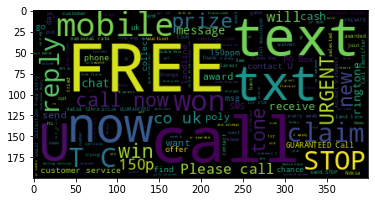

In [11]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['label']=="spam"]['message'])))
plt.imshow(wc)
plt.show()


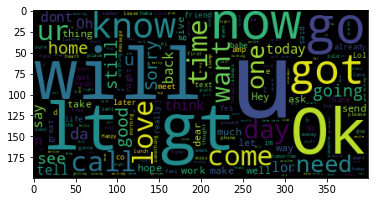

In [12]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['label']=="ham"]['message'])))
plt.imshow(wc)
plt.show()


In [13]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
from nltk.corpus import stopwords
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download("wordnet")


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [17]:
def clean_sent(text):
  #tokenization and case conversion
  token=word_tokenize(text.lower())
  #token--->list of tokens
  #removing non alpha char
  ftoken=[i for i in token if i.isalpha()]
  #ftoken-----> list
  sw=stopwords.words("english")
  stokens=[i for i in ftoken if i not in sw]
  #stokens--->list
  #lemmatization
  lemma=WordNetLemmatizer()
  ltoken=[lemma.lemmatize(i) for i in stokens]
  #ltoken--->list
  #joining all tokens
  return " ".join(ltoken)

In [18]:
df["message"]=df["message"].astype(str)


In [19]:
df["message"]=df["message"].apply(clean_sent)


In [20]:
df.head()

,label,message,length,punct
0,ham,go jurong point crazy available bugis n great ...,111,9
1,ham,ok lar joking wif u oni,29,6
2,spam,free entry wkly comp win fa cup final tkts may...,155,6
3,ham,u dun say early hor u c already say,49,6
4,ham,nah think go usf life around though,61,2


In [21]:
X=df["message"]
X

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                          ü b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [22]:
y=df['label']
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(X).toarray()


In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=1)


In [25]:
#build logistic
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [26]:
def mymodel(model_obj):
  model_obj.fit(xtrain,ytrain)
  ypred=model_obj.predict(xtest)
  print(classification_report(ytest,ypred))
  return model_obj


In [27]:
lr=LogisticRegression()


In [28]:
mymodel(lr)

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1442
        spam       0.96      0.85      0.90       230

    accuracy                           0.97      1672
   macro avg       0.97      0.92      0.94      1672
weighted avg       0.97      0.97      0.97      1672



LogisticRegression()

In [29]:
def result_msg(msg):
  clean_msg=clean_sent(msg)
  x_msg=cv.transform([clean_msg]).toarray()
  pred=lr.predict(x_msg)[0]
  print(pred)

In [30]:
result_msg('Data Science is fun!!!!....')

ham


In [31]:
result_msg('Free...!Free!,Freee!Buy 1 Get 1 Free')

spam


In [32]:
result_msg('Hii')

ham


In [33]:
result_msg('Gautam')

ham


In [34]:
result_msg('Hiii! Get an exciting offer')

ham


In [35]:
result_msg('If you did not grant access, you should check this activity and secure your account.')

ham


In [36]:
result_msg('Good Day. Ritika here from QuickXpert Infotech, Thane. Hope doing Good. Please find details as mentioned below.')

ham


In [37]:
result_msg('''The Greatest Stargazing Internship is slipping out of your hands. Can you imagine? A fully sponsored trip where all you have to do is come with us away from the polluted city life and enjoy stargazing with professionals.

And, and, and...
You get to bring your best friend along (whatttt !!!)

I wouldn't waste any time if I were you (Sadly I'm not eligible urghh, but you are). So start applying today by grabbing your free exclusive early entry!''')

ham


In [38]:
result_msg('Get an exciting offer on deals flat 50% off')

ham


In [39]:
df

,label,message,length,punct
0,ham,go jurong point crazy available bugis n great ...,111,9
1,ham,ok lar joking wif u oni,29,6
2,spam,free entry wkly comp win fa cup final tkts may...,155,6
3,ham,u dun say early hor u c already say,49,6
4,ham,nah think go usf life around though,61,2
...,...,...,...,...
5567,spam,time tried contact u pound prize claim easy ca...,160,8
5568,ham,ü b going esplanade fr home,36,1
5569,ham,pity mood suggestion,57,7
5570,ham,guy bitching acted like interested buying some...,125,1


In [40]:
df.head(5)

,label,message,length,punct
0,ham,go jurong point crazy available bugis n great ...,111,9
1,ham,ok lar joking wif u oni,29,6
2,spam,free entry wkly comp win fa cup final tkts may...,155,6
3,ham,u dun say early hor u c already say,49,6
4,ham,nah think go usf life around though,61,2


In [41]:
result_msg('I wouldn\'t waste any time if I were you (Sadly I\'m not eligible urghh, but you are). So start applying today by grabbing your free exclusive early entry!')

ham


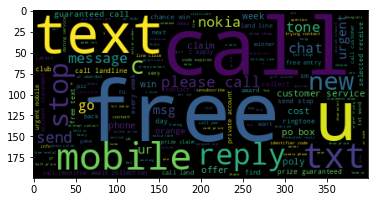

In [42]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['label']=="spam"]['message'])))
plt.imshow(wc)
plt.show()


In [43]:
result_msg('Geat a text to stop a call regarding free txt')

spam


In [44]:
result_msg('nokia free call u text reply collect orange text')

spam


In [45]:
result_msg('stop poly send week call u new text guaranteed call')

spam


In [ ]:
#df['Target']=df['Target'].map({'spam':1,'ham':0})

In [46]:
#Naive - Bayes 

In [47]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [49]:
from sklearn.model_selection import train_test_split


In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)


In [53]:
cv.get_feature_names_out()


array(['aa', 'aah', 'aaniye', ..., 'zoom', 'zouk', 'zyada'], dtype=object)

In [54]:
from sklearn.naive_bayes import MultinomialNB


In [55]:
mulnb=MultinomialNB()


In [57]:
mulnb.fit(X_train,y_train)


MultinomialNB()

In [58]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [59]:
y_train_pred=mulnb.predict(X_train)
y_train_pred

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [60]:
y_test_pred=mulnb.predict(X_test)
y_test_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U4')

In [62]:
from sklearn.metrics import classification_report,roc_auc_score
print('Train Data')
print(classification_report(y_train,y_train_pred))
print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      3863
        spam       0.95      0.96      0.96       594

    accuracy                           0.99      4457
   macro avg       0.97      0.98      0.98      4457
weighted avg       0.99      0.99      0.99      4457

Test Data
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       962
        spam       0.85      0.92      0.89       153

    accuracy                           0.97      1115
   macro avg       0.92      0.95      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [63]:
def result_msgnb(msg):
  clean_msg=clean_sent(msg)
  x_msg=cv.transform([clean_msg]).toarray()
  pred=mulnb.predict(x_msg)[0]
  print(pred)

In [68]:
result_msg('Data Science is fun!!!!....')

ham


In [65]:
result_msgnb('Data Science is fun!!!!....')

ham


In [66]:
result_msg('Free...!Free!,Freee!Buy 1 Get 1 Free')

spam


In [67]:
result_msgnb('Free...!Free!,Freee!Buy 1 Get 1 Free')

spam


In [69]:
result_msg('Geat a text to stop a call regarding free txt')

spam


In [70]:
result_msgnb('Geat a text to stop a call regarding free txt')

spam
